In [11]:
from pathlib import Path
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

import suite2p
from suite2p import run_s2p, default_ops
ops = default_ops() # populates ops with the default options
import sys
sys.path.insert(0, 'C:/Users/lan/Documents/repos/suite2p') # option to import from github folder

import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
    'figure.figsize': (18, 13),
    'ytick.major.left': False,
})
jet = mpl.cm.get_cmap('jet')
jet.set_bad(color='k')

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))


In [2]:
t = 'D:\Lan_temp\suite2p\plane0_i1322_200803_002'
output_op_file = np.load(Path(t).joinpath('ops.npy'), allow_pickle=True).item()

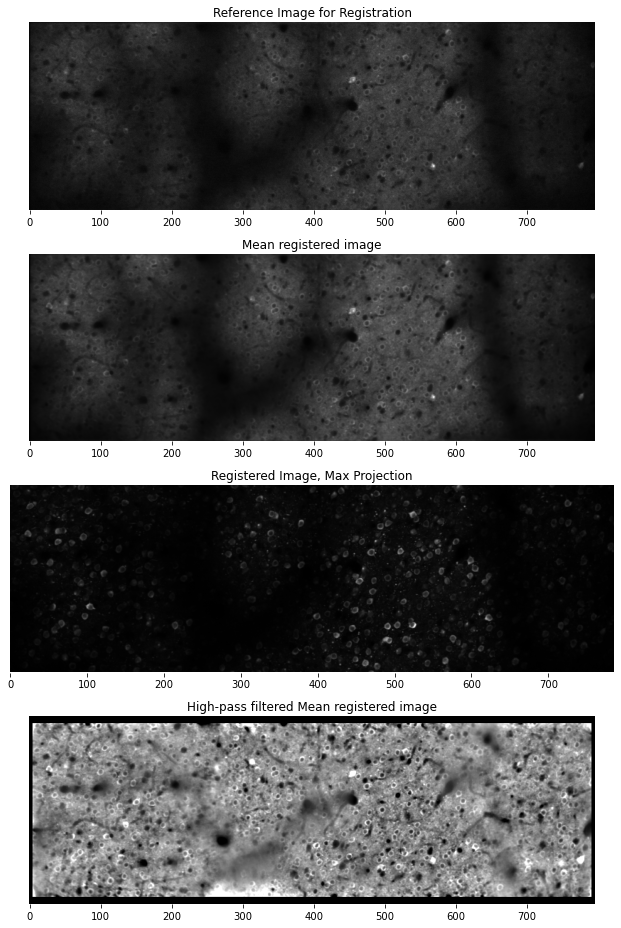

In [6]:
output_op = output_op_file

plt.subplot(4, 1, 1)
plt.imshow(output_op['refImg'], cmap='gray', )
plt.title("Reference Image for Registration");

plt.subplot(4, 1, 3)
plt.imshow(output_op['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

plt.subplot(4, 1, 2)
plt.imshow(output_op['meanImg'], cmap='gray')
plt.title("Mean registered image")

plt.subplot(4, 1, 4)
plt.imshow(output_op['meanImgE'], cmap='gray')
plt.title("High-pass filtered Mean registered image");

plt.tight_layout()

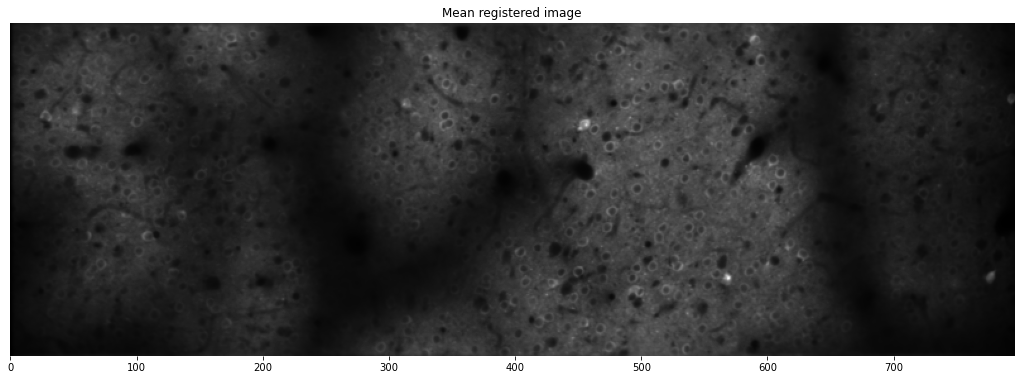

In [8]:
plt.imshow(output_op['meanImg'], cmap='gray')
plt.title("Mean registered image");

In [10]:
type(output_op['meanImg'])

numpy.ndarray

In [14]:
scipy.io.savemat('suite2p_reg_mean_img.mat', {'reg_img_mean': output_op['meanImg']})